In [ ]:
!pip install keras-tcn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tcn import TCN, tcn_full_summary
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from numpy.random import seed
seed(1052023)
from random import randrange

In [ ]:
scaler = MinMaxScaler()

In [ ]:
df = pd.read_excel("STOXX50E Realized Volatility.xlsx",index_col='Date',parse_dates=True)
df_for_date=df[int(len(df['Realised'])*0.7):].reset_index()

# Hyperparameter search

In [ ]:
n_inputs = [21,63,84,126,189,252]
n_neurons = [14,42,56,84,126,168]
dilations = [[1,2,1],[1,2,2,1],[1,2,4,1],[1,2,2,2,1],[1,2,4,2,1],[1,2,4,4,1]]
kernel_size=[2,3,4,6]
epochs=[1,3,5,7,10,15]
dropouts=[0,0.2,0.4]
losses=['mse','mae','huber_loss']
RMSE = []
Accuracy = []

In [ ]:
for m in range (5):
    i=randrange(6)
    h=randrange(6)
    k=randrange(4)
    l=randrange(3)
    m=randrange(6)
    n=randrange(3)
    o=randrange(2)
    seed(1052023)
    train = df.iloc[:int(len(df['Realised'])*0.6)]
    validation = df.iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.7)]
    test = df.iloc[int(len(df['Realised'])*0.7):]
    scaler.fit(train)
    scaled_train_input = scaler.transform(train)
    scaled_validation_input = scaler.transform(validation)
    scaled_test_input = scaler.transform(test)
    train = df["Realised"].iloc[:int(len(df['Realised'])*0.6)]
    validation = df["Realised"].iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.7)]
    test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
    train = train.array.reshape(-1, 1)
    validation = validation.array.reshape(-1, 1)
    test = test.array.reshape(-1, 1)
    scaler.fit(train)
    scaled_train_target = scaler.transform(train)
    scaled_validation_target = scaler.transform(validation)
    scaled_test_target = scaler.transform(test)
    n_features = 2
    n_input = n_inputs[i]
    generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
    model = Sequential()
    model.add(TCN(kernel_size=kernel_size[k], dilations=dilations[i], nb_stacks=1,padding='causal',
                      dropout_rate=dropouts[l],activation='relu',kernel_initializer='he_normal', input_shape=(n_input, n_features)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss=losses[n], metrics=["accuracy", "mean_absolute_error"])
    model.fit(generator,epochs=epochs[m])
    last_train_batch = scaled_train_input[-n_input:]
    last_train_batch = last_train_batch.reshape((1, n_input, n_features))
    a = np.array(scaled_validation_input)
    test_predictions = []
    first_eval_batch = scaled_train_input[-n_input:]
    current_batch = first_eval_batch.reshape((1, n_input, n_features))
    
    for j in range(len(scaled_validation_input)):
            # get the prediction value for the first batch
        current_pred = model.predict(current_batch)[0]
            # append the prediction into the array
        test_predictions.append(current_pred) 
            # use the prediction to update the batch and remove the first value
        current_batch = np.append(current_batch[:,1:,:],[[a[j]]],axis=1)
    true_predictions = scaler.inverse_transform(test_predictions)
    RMSE=(np.sum(np.sqrt((validation-true_predictions)**2))/len(validation))
    Accuracy=((1-(np.sum(np.sqrt((validation-true_predictions)**2)/validation)/len(validation)))*100)
    print(f"Epoch: {epochs[m]} | Inputs: {n_inputs[i]} | Kernel: {kernel_size[k]} | Dropout: {dropouts[l]} | Loss: {losses[n]}")
    print(f"RMSE: {RMSE} | Accuracy: {Accuracy}")

Epoch 1/15
72/72 [==============================] - 17s 17ms/step - loss: 0.7273 - accuracy: 0.0017 - mean_absolute_error: 0.4459
Epoch 2/15
72/72 [==============================] - 1s 9ms/step - loss: 0.0986 - accuracy: 0.0017 - mean_absolute_error: 0.1903
Epoch 3/15
72/72 [==============================] - 1s 9ms/step - loss: 0.0519 - accuracy: 0.0022 - mean_absolute_error: 0.1451
Epoch 4/15
72/72 [==============================] - 1s 9ms/step - loss: 0.0376 - accuracy: 0.0017 - mean_absolute_error: 0.1202
Epoch 5/15
72/72 [==============================] - 1s 10ms/step - loss: 0.0308 - accuracy: 0.0022 - mean_absolute_error: 0.1114
Epoch 6/15
72/72 [==============================] - 1s 9ms/step - loss: 0.0233 - accuracy: 0.0026 - mean_absolute_error: 0.0987
Epoch 7/15
72/72 [==============================] - 1s 9ms/step - loss: 0.0208 - accuracy: 0.0022 - mean_absolute_error: 0.0912
Epoch 8/15
72/72 [==============================] - 1s 9ms/step - loss: 0.0180 - accuracy: 0.0022 - m

In [ ]:
for m in range (5):
    i=randrange(6)
    h=randrange(6)
    k=randrange(4)
    l=randrange(3)
    m=randrange(6)
    n=randrange(3)
    o=randrange(2)
    seed(1052023)
    train = df.iloc[:int(len(df['Realised'])*0.6)]
    validation = df.iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.7)]
    test = df.iloc[int(len(df['Realised'])*0.7):]
    scaler.fit(train)
    scaled_train_input = scaler.transform(train)
    scaled_validation_input = scaler.transform(validation)
    scaled_test_input = scaler.transform(test)
    train = df["Realised"].iloc[:int(len(df['Realised'])*0.6)]
    validation = df["Realised"].iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.7)]
    test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
    train = train.array.reshape(-1, 1)
    validation = validation.array.reshape(-1, 1)
    test = test.array.reshape(-1, 1)
    scaler.fit(train)
    scaled_train_target = scaler.transform(train)
    scaled_validation_target = scaler.transform(validation)
    scaled_test_target = scaler.transform(test)
    n_features = 2
    n_input = n_inputs[i]
    generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
    model = Sequential()
    model.add(TCN(kernel_size=kernel_size[k], dilations=dilations[i], nb_stacks=1,padding='causal',
                      dropout_rate=dropouts[l],activation='relu',kernel_initializer='he_normal', input_shape=(n_input, n_features)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss=losses[n], metrics=["accuracy", "mean_absolute_error"])
    model.fit(generator,epochs=epochs[m])
    last_train_batch = scaled_train_input[-n_input:]
    last_train_batch = last_train_batch.reshape((1, n_input, n_features))
    a = np.array(scaled_validation_input)
    test_predictions = []
    first_eval_batch = scaled_train_input[-n_input:]
    current_batch = first_eval_batch.reshape((1, n_input, n_features))
    
    for j in range(len(scaled_validation_input)):
            # get the prediction value for the first batch
        current_pred = model.predict(current_batch)[0]
            # append the prediction into the array
        test_predictions.append(current_pred) 
            # use the prediction to update the batch and remove the first value
        current_batch = np.append(current_batch[:,1:,:],[[a[j]]],axis=1)
    true_predictions = scaler.inverse_transform(test_predictions)
    RMSE=(np.sum(np.sqrt((validation-true_predictions)**2))/len(validation))
    Accuracy=((1-(np.sum(np.sqrt((validation-true_predictions)**2)/validation)/len(validation)))*100)
    print(f"Epoch: {epochs[m]} | Inputs: {n_inputs[i]} | Kernel: {kernel_size[k]} | Dropout: {dropouts[l]} | Loss: {losses[n]}")
    print(f"RMSE: {RMSE} | Accuracy: {Accuracy}")

Epoch 1/7
72/72 [==============================] - 7s 13ms/step - loss: 0.3560 - accuracy: 0.0022 - mean_absolute_error: 0.3560
Epoch 2/7
72/72 [==============================] - 1s 11ms/step - loss: 0.1078 - accuracy: 0.0022 - mean_absolute_error: 0.1078
Epoch 3/7
72/72 [==============================] - 1s 10ms/step - loss: 0.0727 - accuracy: 0.0022 - mean_absolute_error: 0.0727
Epoch 4/7
72/72 [==============================] - 1s 9ms/step - loss: 0.0646 - accuracy: 0.0022 - mean_absolute_error: 0.0646
Epoch 5/7
72/72 [==============================] - 1s 10ms/step - loss: 0.0572 - accuracy: 0.0022 - mean_absolute_error: 0.0572
Epoch 6/7
72/72 [==============================] - 1s 10ms/step - loss: 0.0514 - accuracy: 0.0022 - mean_absolute_error: 0.0514
Epoch 7/7
1/1 [==============================] - 0s 25ms/step
Epoch: 7 | Inputs: 126 | Kernel: 2 | Dropout: 0.2 | Loss: mae
RMSE: 0.002075729748721324 | Accuracy: 55.644431795733276
Epoch 1/10
74/74 [==============================] -

In [ ]:
for m in range (5):
    i=randrange(6)
    h=randrange(6)
    k=randrange(4)
    l=randrange(3)
    m=randrange(6)
    n=randrange(3)
    o=randrange(2)
    seed(1052023)
    train = df.iloc[:int(len(df['Realised'])*0.6)]
    validation = df.iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.7)]
    test = df.iloc[int(len(df['Realised'])*0.7):]
    scaler.fit(train)
    scaled_train_input = scaler.transform(train)
    scaled_validation_input = scaler.transform(validation)
    scaled_test_input = scaler.transform(test)
    train = df["Realised"].iloc[:int(len(df['Realised'])*0.6)]
    validation = df["Realised"].iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.7)]
    test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
    train = train.array.reshape(-1, 1)
    validation = validation.array.reshape(-1, 1)
    test = test.array.reshape(-1, 1)
    scaler.fit(train)
    scaled_train_target = scaler.transform(train)
    scaled_validation_target = scaler.transform(validation)
    scaled_test_target = scaler.transform(test)
    n_features = 2
    n_input = n_inputs[i]
    generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
    model = Sequential()
    model.add(TCN(kernel_size=kernel_size[k], dilations=dilations[i], nb_stacks=1,padding='causal',
                      dropout_rate=dropouts[l],activation='relu',kernel_initializer='he_normal', input_shape=(n_input, n_features)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss=losses[n], metrics=["accuracy", "mean_absolute_error"])
    model.fit(generator,epochs=epochs[m])
    last_train_batch = scaled_train_input[-n_input:]
    last_train_batch = last_train_batch.reshape((1, n_input, n_features))
    a = np.array(scaled_validation_input)
    test_predictions = []
    first_eval_batch = scaled_train_input[-n_input:]
    current_batch = first_eval_batch.reshape((1, n_input, n_features))
    
    for j in range(len(scaled_validation_input)):
            # get the prediction value for the first batch
        current_pred = model.predict(current_batch)[0]
            # append the prediction into the array
        test_predictions.append(current_pred) 
            # use the prediction to update the batch and remove the first value
        current_batch = np.append(current_batch[:,1:,:],[[a[j]]],axis=1)
    true_predictions = scaler.inverse_transform(test_predictions)
    RMSE=(np.sum(np.sqrt((validation-true_predictions)**2))/len(validation))
    Accuracy=((1-(np.sum(np.sqrt((validation-true_predictions)**2)/validation)/len(validation)))*100)
    print(f"Epoch: {epochs[m]} | Inputs: {n_inputs[i]} | Kernel: {kernel_size[k]} | Dropout: {dropouts[l]} | Loss: {losses[n]}")
    print(f"RMSE: {RMSE} | Accuracy: {Accuracy}")

Epoch 1/15
74/74 [==============================] - 6s 11ms/step - loss: 0.2347 - accuracy: 0.0013 - mean_absolute_error: 0.4499
Epoch 2/15
74/74 [==============================] - 1s 9ms/step - loss: 0.0215 - accuracy: 0.0021 - mean_absolute_error: 0.1324
Epoch 3/15
74/74 [==============================] - 1s 8ms/step - loss: 0.0105 - accuracy: 0.0025 - mean_absolute_error: 0.0931
Epoch 4/15
74/74 [==============================] - 1s 11ms/step - loss: 0.0076 - accuracy: 0.0021 - mean_absolute_error: 0.0805
Epoch 5/15
74/74 [==============================] - 1s 13ms/step - loss: 0.0056 - accuracy: 0.0021 - mean_absolute_error: 0.0688
Epoch 6/15
74/74 [==============================] - 1s 9ms/step - loss: 0.0053 - accuracy: 0.0025 - mean_absolute_error: 0.0663
Epoch 7/15
74/74 [==============================] - 1s 9ms/step - loss: 0.0044 - accuracy: 0.0021 - mean_absolute_error: 0.0603
Epoch 8/15
74/74 [==============================] - 1s 9ms/step - loss: 0.0039 - accuracy: 0.0025 - m

In [ ]:
for m in range (5):
    i=randrange(6)
    h=randrange(6)
    k=randrange(4)
    l=randrange(3)
    m=randrange(6)
    n=randrange(3)
    o=randrange(2)
    seed(1052023)
    train = df.iloc[:int(len(df['Realised'])*0.6)]
    validation = df.iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.7)]
    test = df.iloc[int(len(df['Realised'])*0.7):]
    scaler.fit(train)
    scaled_train_input = scaler.transform(train)
    scaled_validation_input = scaler.transform(validation)
    scaled_test_input = scaler.transform(test)
    train = df["Realised"].iloc[:int(len(df['Realised'])*0.6)]
    validation = df["Realised"].iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.7)]
    test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
    train = train.array.reshape(-1, 1)
    validation = validation.array.reshape(-1, 1)
    test = test.array.reshape(-1, 1)
    scaler.fit(train)
    scaled_train_target = scaler.transform(train)
    scaled_validation_target = scaler.transform(validation)
    scaled_test_target = scaler.transform(test)
    n_features = 2
    n_input = n_inputs[i]
    generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
    model = Sequential()
    model.add(TCN(kernel_size=kernel_size[k], dilations=dilations[i], nb_stacks=1,padding='causal',
                      dropout_rate=dropouts[l],activation='relu',kernel_initializer='he_normal', input_shape=(n_input, n_features)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss=losses[n], metrics=["accuracy", "mean_absolute_error"])
    model.fit(generator,epochs=epochs[m])
    last_train_batch = scaled_train_input[-n_input:]
    last_train_batch = last_train_batch.reshape((1, n_input, n_features))
    a = np.array(scaled_validation_input)
    test_predictions = []
    first_eval_batch = scaled_train_input[-n_input:]
    current_batch = first_eval_batch.reshape((1, n_input, n_features))
    
    for j in range(len(scaled_validation_input)):
            # get the prediction value for the first batch
        current_pred = model.predict(current_batch)[0]
            # append the prediction into the array
        test_predictions.append(current_pred) 
            # use the prediction to update the batch and remove the first value
        current_batch = np.append(current_batch[:,1:,:],[[a[j]]],axis=1)
    true_predictions = scaler.inverse_transform(test_predictions)
    RMSE=(np.sum(np.sqrt((validation-true_predictions)**2))/len(validation))
    Accuracy=((1-(np.sum(np.sqrt((validation-true_predictions)**2)/validation)/len(validation)))*100)
    print(f"Epoch: {epochs[m]} | Inputs: {n_inputs[i]} | Kernel: {kernel_size[k]} | Dropout: {dropouts[l]} | Loss: {losses[n]}")
    print(f"RMSE: {RMSE} | Accuracy: {Accuracy}")

Epoch 1/3
75/75 [==============================] - 4s 9ms/step - loss: 0.2227 - accuracy: 0.0017 - mean_absolute_error: 0.2227
Epoch 2/3
75/75 [==============================] - 1s 7ms/step - loss: 0.0770 - accuracy: 0.0017 - mean_absolute_error: 0.0770
Epoch 3/3
1/1 [==============================] - 0s 21ms/step
Epoch: 3 | Inputs: 21 | Kernel: 3 | Dropout: 0.2 | Loss: mae
RMSE: 0.0021480014142582237 | Accuracy: 55.62147790565617
Epoch 1/5
73/73 [==============================] - 6s 12ms/step - loss: 0.2566 - accuracy: 0.0021 - mean_absolute_error: 0.2566
Epoch 2/5
73/73 [==============================] - 1s 8ms/step - loss: 0.0646 - accuracy: 0.0021 - mean_absolute_error: 0.0646
Epoch 3/5
73/73 [==============================] - 1s 8ms/step - loss: 0.0473 - accuracy: 0.0021 - mean_absolute_error: 0.0473
Epoch 4/5
73/73 [==============================] - 1s 8ms/step - loss: 0.0507 - accuracy: 0.0021 - mean_absolute_error: 0.0507
Epoch 5/5
1/1 [==============================] - 0s 25ms

Epoch: 10 | Inputs: 252 | Kernel: 3 | Dropout: 0.2 | Loss: huber_loss
RMSE: 0.0019869529577125782 | Accuracy: 65.06933701295996

# H=1 Forecasts

In [ ]:
RMSE = []
Accuracy = []
Quasilikelihood=[]

In [ ]:
train = df.iloc[:int(len(df['Realised'])*0.7)]
test = df.iloc[int(len(df['Realised'])*0.7):]
scaler.fit(train)
scaled_train_input = scaler.transform(train)
scaled_test_input = scaler.transform(test)
train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
train = train.array.reshape(-1, 1)
test = test.array.reshape(-1, 1)
scaler.fit(train)
scaled_train_target = scaler.transform(train)
scaled_test_target = scaler.transform(test)
n_features = 2
n_input = 252
generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
model = Sequential()
model.add(TCN(kernel_size=3, dilations=[1,2,4,4,1], nb_stacks=1,padding='causal',
              dropout_rate=0.2,activation='relu',kernel_initializer='he_normal', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='huber_loss', metrics=["accuracy", "mean_absolute_error"])
model.fit(generator,epochs=10)
last_train_batch = scaled_train_input[-n_input:]
last_train_batch = last_train_batch.reshape((1, n_input, n_features))
a = np.array(scaled_test_input)
test_predictions = []
first_eval_batch = scaled_train_input[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))
    
for j in range(len(test)):
            # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
            # append the prediction into the array
    test_predictions.append(current_pred) 
            # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[a[j]]],axis=1)
true_predictions = scaler.inverse_transform(test_predictions)
RMSE.append(np.sum(np.sqrt((test-true_predictions)**2))/len(test))
Accuracy.append((1-np.sum(np.sqrt((test-true_predictions)**2)/test)/(len(test)))*100)
Quasilikelihood.append(np.sum(true_predictions/test-np.log(true_predictions/test)-1)/len(test))

Epoch 1/10
81/81 [==============================] - 7s 11ms/step - loss: 0.1197 - accuracy: 0.0012 - mean_absolute_error: 0.3169
Epoch 2/10
81/81 [==============================] - 1s 10ms/step - loss: 0.0140 - accuracy: 0.0019 - mean_absolute_error: 0.1098
Epoch 3/10
81/81 [==============================] - 1s 10ms/step - loss: 0.0082 - accuracy: 0.0016 - mean_absolute_error: 0.0854
Epoch 4/10
81/81 [==============================] - 1s 10ms/step - loss: 0.0064 - accuracy: 0.0019 - mean_absolute_error: 0.0749
Epoch 5/10
81/81 [==============================] - 1s 10ms/step - loss: 0.0046 - accuracy: 0.0019 - mean_absolute_error: 0.0654
Epoch 6/10
81/81 [==============================] - 1s 13ms/step - loss: 0.0041 - accuracy: 0.0019 - mean_absolute_error: 0.0609
Epoch 7/10
81/81 [==============================] - 1s 14ms/step - loss: 0.0037 - accuracy: 0.0016 - mean_absolute_error: 0.0573
Epoch 8/10
81/81 [==============================] - 1s 12ms/step - loss: 0.0034 - accuracy: 0.001

In [ ]:
RMSE

[0.0034801999160083983,
 0.003039607171810083,
 0.00333263518197217,
 0.0033692124053143,
 0.002987148115769616,
 0.0031350660707978547,
 0.0030433936869936,
 0.0029791229090521325,
 0.0029491764735150834,
 0.002971207674853408,
 0.0028646019711800696,
 0.002918488776548783,
 0.0030810328467558495,
 0.003241591759885049,
 0.0029258506235531165]

In [ ]:
Accuracy

[46.74621456967781,
 58.56376436410532,
 50.92362852307477,
 65.04555320720742,
 60.51452390951877,
 55.387921138352134,
 63.13152665025943,
 62.23686930156537,
 60.34116479917145,
 60.13129370836472,
 62.62196008602186,
 61.4343930893499,
 58.66425102811152,
 54.18780924049531,
 65.05705832085135]

In [ ]:
Quasilikelihood

[0.15937040249341886,
 0.1103866717879741,
 0.1394441305541822,
 0.10400385728352259,
 0.10386071639308113,
 0.1243844666826006,
 0.09723653726288163,
 0.09895722099616601,
 0.1040141060605611,
 0.10561487648138972,
 0.09645182396006902,
 0.09899406133184686,
 0.11088019653552195,
 0.12792871811269266,
 0.09058993230115207]

Text(0, 0.5, 'STOXX50E Realized Volatility')

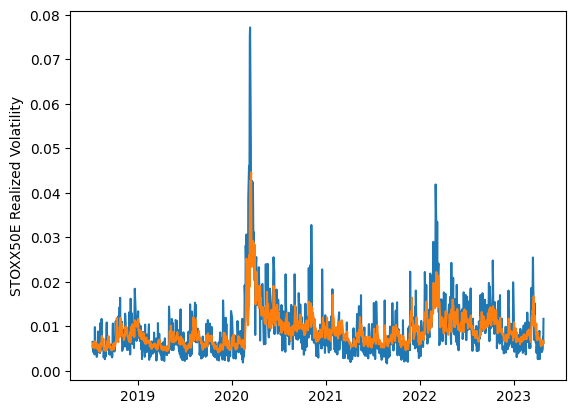

In [ ]:
# Best model
plt.plot(df_for_date["Date"], test)
plt.plot(df_for_date["Date"], true_predictions) 
plt.ylabel("STOXX50E Realized Volatility")

# H=3 Forecasts

In [ ]:
RMSE = []
Accuracy = []
Quasilikelihood=[]

In [ ]:
train = df.iloc[:int(len(df['Realised'])*0.7)]
test = df.iloc[int(len(df['Realised'])*0.7):]
scaler.fit(train)
scaled_train_input = scaler.transform(train)
scaled_test_input = scaler.transform(test)
train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
train = train.array.reshape(-1, 1)
test = test.array.reshape(-1, 1)
scaler.fit(train)
scaled_train_target = scaler.transform(train)
scaled_test_target = scaler.transform(test)
n_features = 2
n_input = 252
generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
model = Sequential()
model.add(TCN(kernel_size=3, dilations=[1,2,4,4,1], nb_stacks=1,padding='causal',
              dropout_rate=0.2,activation='relu',kernel_initializer='he_normal', input_shape=(n_input, n_features)))
model.add(Dense(3))
model.compile(optimizer='adam', loss='huber_loss', metrics=["accuracy", "mean_absolute_error"])
model.fit(generator,epochs=10)
last_train_batch = scaled_train_input[-n_input:]
last_train_batch = last_train_batch.reshape((1, n_input, n_features))
a = np.array(scaled_test_input)
test_predictions = []
first_eval_batch = scaled_train_input[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))
    
for j in range(int(len(test)/3)):
            # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
            # append the prediction into the array
    test_predictions.append(current_pred) 
            # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,3:,:],[a[j*3:(j+1)*3]],axis=1)
true_predictions = scaler.inverse_transform(test_predictions)
test=test[:len(test)-1]
true_predictions=true_predictions.reshape(len(test),1)
RMSE.append(np.sum(np.sqrt((test-true_predictions)**2))/len(test))
Accuracy.append((1-np.sum(np.sqrt((test-true_predictions)**2)/test)/(len(test)))*100)
Quasilikelihood.append(np.sum(true_predictions/test-np.log(true_predictions/test)-1)/len(test))

Epoch 1/10
81/81 [==============================] - 8s 16ms/step - loss: 0.2341 - accuracy: 0.3387 - mean_absolute_error: 0.4099
Epoch 2/10
81/81 [==============================] - 1s 15ms/step - loss: 0.0126 - accuracy: 0.3605 - mean_absolute_error: 0.1025
Epoch 3/10
81/81 [==============================] - 1s 14ms/step - loss: 0.0078 - accuracy: 0.3250 - mean_absolute_error: 0.0818
Epoch 4/10
81/81 [==============================] - 2s 20ms/step - loss: 0.0057 - accuracy: 0.3951 - mean_absolute_error: 0.0705
Epoch 5/10
81/81 [==============================] - 2s 20ms/step - loss: 0.0044 - accuracy: 0.3764 - mean_absolute_error: 0.0616
Epoch 6/10
81/81 [==============================] - 1s 18ms/step - loss: 0.0040 - accuracy: 0.3904 - mean_absolute_error: 0.0580
Epoch 7/10
81/81 [==============================] - 1s 15ms/step - loss: 0.0032 - accuracy: 0.4083 - mean_absolute_error: 0.0533
Epoch 8/10
81/81 [==============================] - 1s 15ms/step - loss: 0.0030 - accuracy: 0.372

In [ ]:
RMSE

[0.003520465276983543,
 0.003152706833261081,
 0.0032375851517917153,
 0.0034822580828666864,
 0.0033511691864114537,
 0.003153877196237645,
 0.0032442759191461975,
 0.0032882551109716953,
 0.00315488190638208,
 0.003431883497136646,
 0.003255315658048268,
 0.0034803906923634837,
 0.0032013866852469313,
 0.0033209758826492105,
 0.0031163267366272015]

In [ ]:
Accuracy

[46.76146790427633,
 62.48176053011919,
 55.45295045651471,
 48.07109933368532,
 51.87477338879489,
 57.08146443854637,
 53.708013032173184,
 53.87721187973589,
 56.93992144106868,
 49.265097800181124,
 54.53532417115032,
 47.66978652473767,
 56.687318919416995,
 53.56760354808298,
 60.06376874971332]

In [ ]:
Quasilikelihood

[0.15784286796998406,
 0.1025303324766712,
 0.12561603552625117,
 0.15194266674158324,
 0.1389116293598361,
 0.1181530877705322,
 0.12966465232357202,
 0.13032130698474087,
 0.11830688657189617,
 0.14708138328589018,
 0.12653094939731335,
 0.15555209458157543,
 0.12031068378872392,
 0.13076301230024398,
 0.10900202052470562]

Text(0, 0.5, 'STOXX50E Realized Volatility')

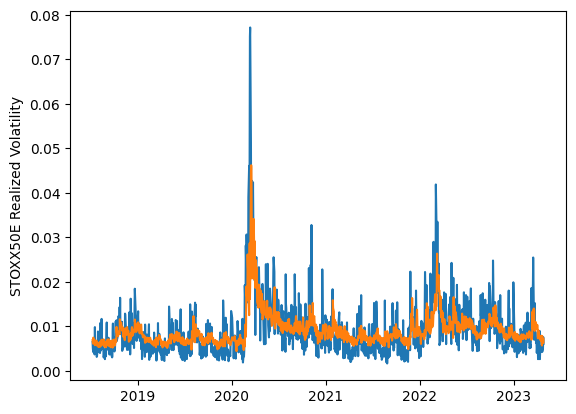

In [ ]:
# Best model
plt.plot(df_for_date["Date"][:len(df_for_date["Date"])-1], test)
plt.plot(df_for_date["Date"][:len(df_for_date["Date"])-1], true_predictions) 
plt.ylabel("STOXX50E Realized Volatility")

# H=5 Forecasts

In [ ]:
RMSE = []
Accuracy = []
Quasilikelihood=[]

In [ ]:
train = df.iloc[:int(len(df['Realised'])*0.7)]
test = df.iloc[int(len(df['Realised'])*0.7):]
scaler.fit(train)
scaled_train_input = scaler.transform(train)
scaled_test_input = scaler.transform(test)
train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
train = train.array.reshape(-1, 1)
test = test.array.reshape(-1, 1)
scaler.fit(train)
scaled_train_target = scaler.transform(train)
scaled_test_target = scaler.transform(test)
n_features = 2
n_input = 252
generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
model = Sequential()
model.add(TCN(kernel_size=3, dilations=[1,2,4,4,1], nb_stacks=1,padding='causal',
              dropout_rate=0.2,activation='relu',kernel_initializer='he_normal', input_shape=(n_input, n_features)))
model.add(Dense(5))
model.compile(optimizer='adam', loss='huber_loss', metrics=["accuracy", "mean_absolute_error"])
model.fit(generator,epochs=10)
last_train_batch = scaled_train_input[-n_input:]
last_train_batch = last_train_batch.reshape((1, n_input, n_features))
a = np.array(scaled_test_input)
test_predictions = []
first_eval_batch = scaled_train_input[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))
    
for j in range(int(len(test)/5)):
            # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
            # append the prediction into the array
    test_predictions.append(current_pred) 
            # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,5:,:],[a[j*5:(j+1)*5]],axis=1)
true_predictions = scaler.inverse_transform(test_predictions)
true_predictions=true_predictions.reshape(len(test),1)
RMSE.append(np.sum(np.sqrt((test-true_predictions)**2))/len(test))
Accuracy.append((1-np.sum(np.sqrt((test-true_predictions)**2)/test)/(len(test)))*100)
Quasilikelihood.append(np.sum(true_predictions/test-np.log(true_predictions/test)-1)/len(test))

Epoch 1/10
81/81 [==============================] - 12s 19ms/step - loss: 0.0811 - accuracy: 0.1732 - mean_absolute_error: 0.2256
Epoch 2/10
81/81 [==============================] - 1s 17ms/step - loss: 0.0074 - accuracy: 0.1915 - mean_absolute_error: 0.0792
Epoch 3/10
81/81 [==============================] - 1s 16ms/step - loss: 0.0047 - accuracy: 0.1724 - mean_absolute_error: 0.0647
Epoch 4/10
81/81 [==============================] - 1s 16ms/step - loss: 0.0038 - accuracy: 0.1853 - mean_absolute_error: 0.0581
Epoch 5/10
81/81 [==============================] - 2s 19ms/step - loss: 0.0033 - accuracy: 0.2118 - mean_absolute_error: 0.0543
Epoch 6/10
81/81 [==============================] - 2s 20ms/step - loss: 0.0030 - accuracy: 0.1837 - mean_absolute_error: 0.0516
Epoch 7/10
81/81 [==============================] - 1s 18ms/step - loss: 0.0027 - accuracy: 0.1841 - mean_absolute_error: 0.0489
Epoch 8/10
81/81 [==============================] - 1s 16ms/step - loss: 0.0025 - accuracy: 0.19

In [ ]:
RMSE

[0.0034225809042170356,
 0.003588641537526693,
 0.0033281439511695845,
 0.0033266318340273147,
 0.003424299231091166,
 0.0037659930828324297,
 0.0033986169842803323,
 0.0033800602715440657,
 0.0033204371673226387,
 0.0034326983491039737,
 0.003560808378741065,
 0.003367653296515285,
 0.003329486172754311,
 0.003564432023884924,
 0.003795168779956256]

In [ ]:
Accuracy

[50.40982150575737,
 45.48466688812268,
 53.380726456360975,
 53.80650128420783,
 50.42547268938733,
 42.221782986136915,
 51.698367791954446,
 51.468895282058604,
 53.384043452444054,
 49.29674158716384,
 47.1005717552734,
 51.99354048841669,
 53.22525129610127,
 46.85079274549943,
 42.021890375427205]

In [ ]:
Quasilikelihood

[0.14520369845955933,
 0.16488998435106078,
 0.1343150960483587,
 0.1330627222159041,
 0.14566597743398532,
 0.17900023719582733,
 0.14100092429091166,
 0.14129980517103247,
 0.1330273688412598,
 0.15075948352457258,
 0.15885389271309572,
 0.13877292761600696,
 0.13582337915823975,
 0.16001282665471522,
 0.1802644372216731]

Text(0, 0.5, 'STOXX50E Realized Volatility')

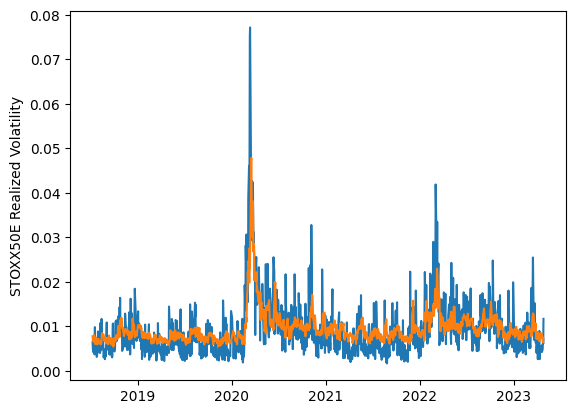

In [ ]:
# Best model
plt.plot(df_for_date["Date"], test)
plt.plot(df_for_date["Date"], true_predictions) 
plt.ylabel("STOXX50E Realized Volatility")

# H=10 Forecasts

In [ ]:
RMSE = []
Accuracy = []
Quasilikelihood=[]

In [ ]:
train = df.iloc[:int(len(df['Realised'])*0.7)]
test = df.iloc[int(len(df['Realised'])*0.7):]
scaler.fit(train)
scaled_train_input = scaler.transform(train)
scaled_test_input = scaler.transform(test)
train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
train = train.array.reshape(-1, 1)
test = test.array.reshape(-1, 1)
scaler.fit(train)
scaled_train_target = scaler.transform(train)
scaled_test_target = scaler.transform(test)
n_features = 2
n_input = 252
generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
model = Sequential()
model.add(TCN(kernel_size=3, dilations=[1,2,4,4,1], nb_stacks=1,padding='causal',
              dropout_rate=0.2,activation='relu',kernel_initializer='he_normal', input_shape=(n_input, n_features)))
model.add(Dense(10))
model.compile(optimizer='adam', loss='huber_loss', metrics=["accuracy", "mean_absolute_error"])
model.fit(generator,epochs=10)
last_train_batch = scaled_train_input[-n_input:]
last_train_batch = last_train_batch.reshape((1, n_input, n_features))
a = np.array(scaled_test_input)
test_predictions = []
first_eval_batch = scaled_train_input[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))
    
for j in range(int(len(test)/10)):
            # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
            # append the prediction into the array
    test_predictions.append(current_pred) 
            # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,10:,:],[a[j*10:(j+1)*10]],axis=1)
true_predictions = scaler.inverse_transform(test_predictions)
true_predictions=true_predictions.reshape(len(test),1)
RMSE.append(np.sum(np.sqrt((test-true_predictions)**2))/len(test))
Accuracy.append((1-np.sum(np.sqrt((test-true_predictions)**2)/test)/(len(test)))*100)
Quasilikelihood.append(np.sum(true_predictions/test-np.log(true_predictions/test)-1)/len(test))

Epoch 1/10
81/81 [==============================] - 12s 16ms/step - loss: 0.0797 - accuracy: 0.0802 - mean_absolute_error: 0.2186
Epoch 2/10
81/81 [==============================] - 1s 16ms/step - loss: 0.0073 - accuracy: 0.1059 - mean_absolute_error: 0.0770
Epoch 3/10
81/81 [==============================] - 1s 17ms/step - loss: 0.0048 - accuracy: 0.0989 - mean_absolute_error: 0.0636
Epoch 4/10
81/81 [==============================] - 2s 20ms/step - loss: 0.0037 - accuracy: 0.0634 - mean_absolute_error: 0.0561
Epoch 5/10
81/81 [==============================] - 2s 20ms/step - loss: 0.0031 - accuracy: 0.0568 - mean_absolute_error: 0.0526
Epoch 6/10
81/81 [==============================] - 1s 15ms/step - loss: 0.0028 - accuracy: 0.0432 - mean_absolute_error: 0.0497
Epoch 7/10
81/81 [==============================] - 1s 16ms/step - loss: 0.0026 - accuracy: 0.0409 - mean_absolute_error: 0.0483
Epoch 8/10
81/81 [==============================] - 1s 16ms/step - loss: 0.0025 - accuracy: 0.05

In [ ]:
RMSE

[0.003936411570048088,
 0.003441589423746926,
 0.00391422018634797,
 0.003704722545222282,
 0.0036253063555599,
 0.0036655333248989583,
 0.0034572619952661122,
 0.003446664878645229,
 0.003990229047980644,
 0.003396066969180762,
 0.0037276276187394176,
 0.003835705865706795,
 0.003585818372663409,
 0.003659853241860474,
 0.003618854263382662]

In [ ]:
Accuracy

[39.75228921866014,
 51.72572112966554,
 40.16994314958262,
 45.496910763516965,
 46.610985725316944,
 46.49523228475554,
 50.79360081546995,
 50.642959109530786,
 38.25879128277783,
 52.44296039647143,
 45.91629301936538,
 41.36680013168977,
 48.249193461124165,
 43.7174232316266,
 47.70354925760847]

In [ ]:
Quasilikelihood

[0.1930269029854262,
 0.14577294697721763,
 0.191677622421292,
 0.17076366481726668,
 0.1642679753370454,
 0.16441728515340828,
 0.14889989385642266,
 0.1465093931173493,
 0.19901265960195583,
 0.1396839286801435,
 0.16635567673045645,
 0.18616472779532683,
 0.15458307111124173,
 0.17763021697312442,
 0.15933721539567935]

Text(0, 0.5, 'STOXX50E Realized Volatility')

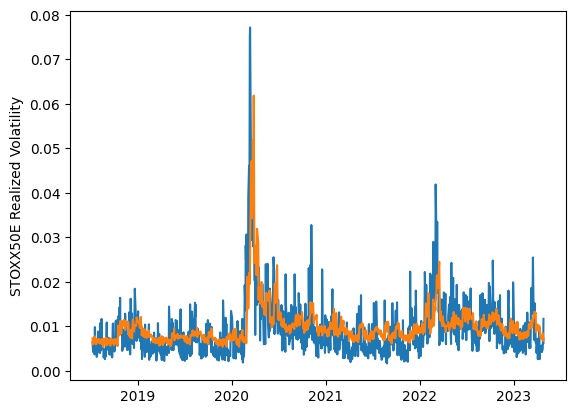

In [ ]:
# Best model
plt.plot(df_for_date["Date"], test)
plt.plot(df_for_date["Date"], true_predictions) 
plt.ylabel("STOXX50E Realized Volatility")

# H=22 Forecasts

In [ ]:
RMSE = []
Accuracy = []
Quasilikelihood=[]

In [ ]:
for i in range(5):
  train = df.iloc[:int(len(df['Realised'])*0.7)]
  test = df.iloc[int(len(df['Realised'])*0.7):]
  scaler.fit(train)
  scaled_train_input = scaler.transform(train)
  scaled_test_input = scaler.transform(test)
  train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
  test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
  train = train.array.reshape(-1, 1)
  test = test.array.reshape(-1, 1)
  scaler.fit(train)
  scaled_train_target = scaler.transform(train)
  scaled_test_target = scaler.transform(test)
  n_features = 2
  n_input = 252
  generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
  model = Sequential()
  model.add(TCN(kernel_size=3, dilations=[1,2,4,4,1], nb_stacks=1,padding='causal',
                dropout_rate=0.2,activation='relu',kernel_initializer='he_normal', input_shape=(n_input, n_features)))
  model.add(Dense(22))
  model.compile(optimizer='adam', loss='huber_loss', metrics=["accuracy", "mean_absolute_error"])
  model.fit(generator,epochs=10)
  last_train_batch = scaled_train_input[-n_input:]
  last_train_batch = last_train_batch.reshape((1, n_input, n_features))
  a = np.array(scaled_test_input)
  test_predictions = []
  first_eval_batch = scaled_train_input[-n_input:]
  current_batch = first_eval_batch.reshape((1, n_input, n_features))
      
  for j in range(int(len(test)/22)):
              # get the prediction value for the first batch
      current_pred = model.predict(current_batch)[0]
              # append the prediction into the array
      test_predictions.append(current_pred) 
              # use the prediction to update the batch and remove the first value
      current_batch = np.append(current_batch[:,22:,:],[a[j*22:(j+1)*22]],axis=1)
  true_predictions = scaler.inverse_transform(test_predictions)
  true_predictions=true_predictions.reshape(len(test),1)
  RMSE.append(np.sum(np.sqrt((test-true_predictions)**2))/len(test))
  Accuracy.append((1-np.sum(np.sqrt((test-true_predictions)**2)/test)/(len(test)))*100)
  Quasilikelihood.append(np.sum(true_predictions/test-np.log(true_predictions/test)-1)/len(test))

Epoch 1/10
81/81 [==============================] - 10s 16ms/step - loss: 0.1006 - accuracy: 0.0568 - mean_absolute_error: 0.2414
Epoch 2/10
81/81 [==============================] - 1s 16ms/step - loss: 0.0079 - accuracy: 0.0160 - mean_absolute_error: 0.0828
Epoch 3/10
81/81 [==============================] - 1s 15ms/step - loss: 0.0051 - accuracy: 0.0074 - mean_absolute_error: 0.0671
Epoch 4/10
81/81 [==============================] - 1s 17ms/step - loss: 0.0042 - accuracy: 0.0078 - mean_absolute_error: 0.0603
Epoch 5/10
81/81 [==============================] - 1s 16ms/step - loss: 0.0035 - accuracy: 0.0117 - mean_absolute_error: 0.0554
Epoch 6/10
81/81 [==============================] - 2s 21ms/step - loss: 0.0031 - accuracy: 0.0066 - mean_absolute_error: 0.0527
Epoch 7/10
81/81 [==============================] - 2s 21ms/step - loss: 0.0028 - accuracy: 0.0054 - mean_absolute_error: 0.0499
Epoch 8/10
81/81 [==============================] - 1s 16ms/step - loss: 0.0026 - accuracy: 0.00

In [ ]:
RMSE

[0.004674385110067552,
 0.00399798638735707,
 0.004271995066377205,
 0.004563383679017738,
 0.003908967557071021,
 0.004139749332852198,
 0.00402913397117054,
 0.005059915658992505,
 0.004092777544861441,
 0.004371928486897298,
 0.0039101511888353195,
 0.0037351399401952643,
 0.004126960171083414,
 0.003773285752675005,
 0.00402814100790574]

In [ ]:
Accuracy

[27.60046134871984,
 41.144242493609305,
 35.279019471903375,
 28.73634494301203,
 42.329250910609396,
 37.405237007081546,
 40.34207136276681,
 20.477147774650795,
 38.44393967781167,
 33.48630029056196,
 44.22135364799331,
 48.899381613244586,
 37.54565399680436,
 45.35238400391268,
 39.09852041511878]

In [ ]:
Quasilikelihood

[0.2560384476667016,
 0.19477674248514876,
 0.2179892886949053,
 0.24988843182133916,
 0.18825891161156388,
 0.2101233416199482,
 0.19694654421977656,
 0.2900479123988169,
 0.20345571897897494,
 0.22946352817176485,
 0.1806491738862107,
 0.16193194622878548,
 0.2106863834066943,
 0.17670745619527467,
 0.2031051441559738]

Text(0, 0.5, 'STOXX50E Realized Volatility')

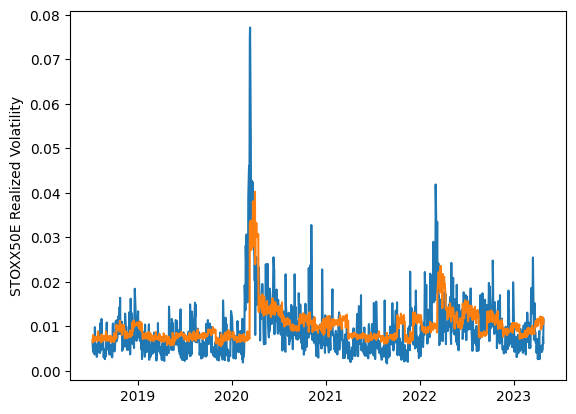

In [ ]:
# Best model
plt.plot(df_for_date["Date"], test)
plt.plot(df_for_date["Date"], true_predictions) 
plt.ylabel("STOXX50E Realized Volatility")